# Validation of the Abe model

This document contains the validation of the Abe model as presented by [Abe et al. (1994](https://www.sciencedirect.com/science/article/pii/0017931094901686)

In [731]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [732]:
Re = 395
df_field = pd.read_fwf('../laminarbl.csv',widths=30*[20]) #the complete fi?eld
df_field['uplus_']    =df_field['uplus'].apply(lambda x: float(x))
df_field['y_']    =df_field['y'].apply(lambda x: 1-float(x))
df_field['mut_scaled']=df_field['mut'].apply(lambda x: x*Re)
df_num = df_field[df_field['x']==df_field['x'].unique()[25]]
df_num = df_num.iloc[1:]
#read the validation data
df_val_uplus = pd.read_csv("validation_data/Abe(1994)_uplus.csv", sep='\t', header=None, names=['yplus', 'uplus'])
df_val_mut = pd.read_csv("validation_data/Abe(1994)_mut.csv", sep='\t', header=None, names=['yplus', 'mut'])

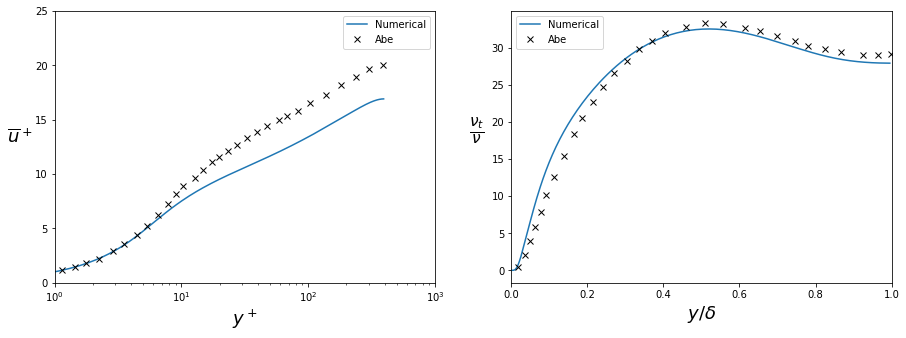

In [733]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df_num.plot('yplus', 'uplus_',ax=ax1, label='Numerical')
df_val_uplus.plot('yplus','uplus',ax=ax1, marker='x', linestyle="None",color='k', label='Abe' )
ax1.set_xscale('log')
ax1.set_xlabel(r"$y^+$", fontsize=18)
ax1.set_ylabel(r"$\overline{u}^+$", rotation=0, fontsize=18, labelpad=15)
ax1.set_xbound(1,1000)
ax1.set_ybound(0,25)
df_num.plot('y_', 'mut_scaled',ax=ax2, label='Numerical')
df_val_mut.plot('yplus','mut',ax=ax2, marker='x', linestyle="None",color='k', label='Abe' )
ax2.set_xlabel(r"$y/\delta$", fontsize=18)
ax2.set_ylabel(r"$\frac{\nu_t}{\nu}$", rotation=0, fontsize=22, labelpad=15)
ax2.set_xbound(0,1)
# ax2.set_ybound(0,40)

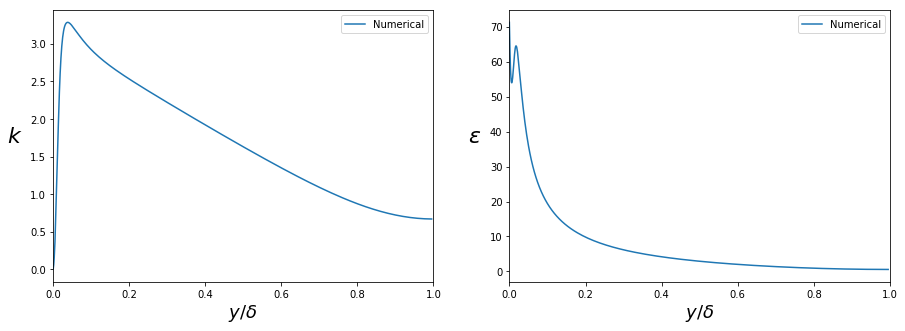

In [734]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df_num.plot('y_', 'k',ax=ax1, label='Numerical')
df_num.plot('y_', 'eps',ax=ax2, label='Numerical')
ax1.set_xlabel(r"$y/\delta$", fontsize=18)
ax1.set_ylabel(r"$k$", rotation=0, fontsize=22, labelpad=15)
ax1.set_xbound(0,1)
ax2.set_xlabel(r"$y/\delta$", fontsize=18)
ax2.set_ylabel(r"$\epsilon$", rotation=0, fontsize=22, labelpad=15)
ax2.set_xbound(0,1)

In [735]:
df_num['w'].max()

16.9059973